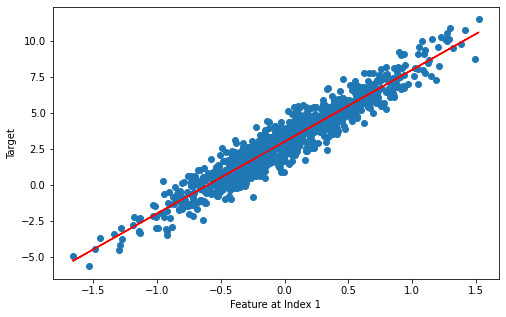

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Cria um problema de regressão
mu, sigma = 0, 0.5 # mean and standard deviation
X = np.random.normal(mu, sigma, 1000)# Visualize feature at index 1 vs target
noise = np.random.normal(mu,0.8 , 1000)
m=5
b=3
y = m*X + b
ynoise = y+noise

plt.subplots(figsize=(8, 5))

plt.scatter(X, ynoise, marker='o')
plt.plot(X, y,'-r')
plt.xlabel("Feature at Index 1")
plt.ylabel("Target")
plt.show()


In [70]:
y.shape

(1000,)

In [71]:

# adiciona x0 = 1 para cada instância
X_b = np.array([np.ones(X.shape), X]).T
print(X_b.shape)
# calcula equação normal
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# melhor ajuste para theta
intercept, *coef = theta_best
print(f"Intercepto: {intercept}\n\
Coeficientes: {coef}")


(1000, 2)
Intercepto: 3.000000000000003
Coeficientes: [5.0000000000000036]


In [72]:
yfit = coef*X + intercept

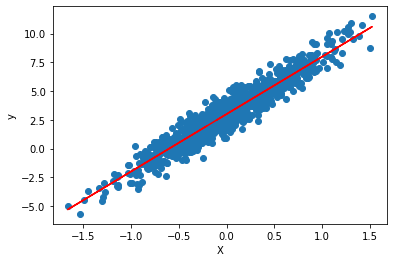

In [73]:
plt.scatter(X, ynoise, marker='o')
plt.plot(X, yfit,'-r')
plt.xlabel("X")
plt.ylabel("y")
plt.show()


In [79]:
#Gradient descent
def mean_squared_error(y_true, y_predicted):

    # Calculating the loss or cost

    cost = np.sum((y_true-y_predicted)**2) / len(y_true)
    return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):
	
	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	weights = []
	previous_cost = None
	
	# Estimation of optimal parameters
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_weight * x) + current_bias
		
		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)
		
		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)
		
		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)
				
		# Printing the parameters for each 1000th iteration
		#print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		#{current_weight}, Bias {current_bias}")
	
	
	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()
	
	return current_weight, current_bias





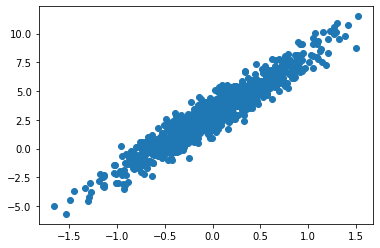

In [80]:
plt.scatter(X,ynoise)

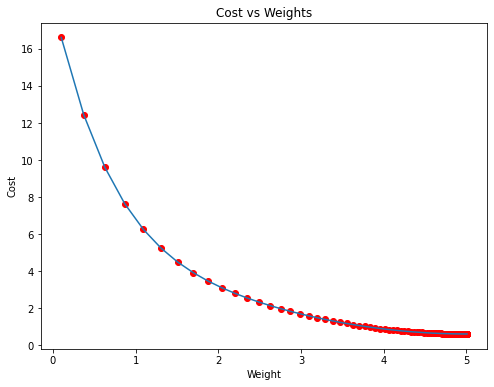

Estimated Weight: 5.011058767460689
Estimated Bias: 3.0060906223440584


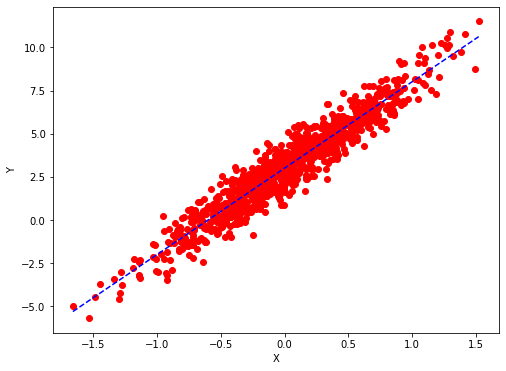

In [83]:

# Estimating weight and bias using gradient descent
estimated_weight, estimated_bias = gradient_descent(X, ynoise, iterations=2000,learning_rate=0.1)
print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

# Making predictions using estimated parameters
Y_pred = estimated_weight*X + estimated_bias

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, ynoise, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
		markersize=10,linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [68]:

# Data
X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
	55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
	45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
	48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
	78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
	55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
	60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])
